Creating first MVP product

## Install Libraries

Installations for extra packages: 
- !pip install SpeechRecognition
- !pip install PocketSphinx
- !brew install portaudio
- !pip install pyaudio

## Data Sources:

- __[NYT daily from podbay](http://podbay.fm/show/1200361736/e/1527587699?autostart=1)__; 
- NYT daily: https://itunes.apple.com/us/podcast/the-daily/id1200361736?mt=2&ign-mpt=uo%3D4
- Open Audio Source: http://www.openslr.org/resources.php
- Economist: https://www.economist.com/audio-edition/2018-06-02
- NPR: https://www.npr.org/programs/morning-edition/
- NPR sunday: https://www.npr.org/programs/weekend-edition-sunday/


## Speech Recognition

- Real python: https://realpython.com/python-speech-recognition/#working-with-audio-files
- Speech Recognition: https://github.com/Uberi/speech_recognition#readme
- Speech Recognition: https://pypi.org/project/SpeechRecognition/3.2.0/
- Pocket Sphinx: https://pypi.org/project/pocketsphinx/
- Pydub: https://github.com/jiaaro/pydub/blob/master/API.markdown
- Audio processing in python: http://myinspirationinformation.com/uncategorized/audio-signals-in-python/

## Natural Language Processing

- Insight: https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e
- Intro/resource: https://github.com/icoxfog417/awesome-text-summarization


***
### Import basic libraries
***


In [131]:
import speech_recognition as sr
import time as time

from pydub import AudioSegment ##for audio spliting
from pydub.silence import split_on_silence

from os import listdir
from os.path import isfile, join

from numpy import fft as fft
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import seaborn as sns
from tqdm import tqdm
 
%matplotlib inline
# !ls Data/EC_06022018

In [2]:
## Intitialize a recognizer
r_live = sr.Recognizer()
r_rec  = sr.Recognizer()

In [5]:
# obtain audio from the microphone
with sr.Microphone() as source:
    print("Say something!")
    audio = r_live.listen(source)

Say something!



***
### Study WAV sound files
***


In [105]:
# The wav file path
## Text link: https://www.economist.com/science-and-technology/2018/06/02/a-rocket-that-devours-itself
f_wav_man = 'Data/EC_06022018/82 082 Science and technology - Space flight.wav' ##Male
## Text link: https://www.economist.com/science-and-technology/2018/06/02/hiv-volunteers-are-bequeathing-their-organs-to-a-new-project
f_wav_woman = 'Data/EC_06022018/81 081 Science and technology - AIDS.wav' #
f_wav = f_wav_woman

In [153]:
## Get the length of audio file
sound = AudioSegment.from_file(f_wav)
print(sound.duration_seconds)
print("DBFS", sound.dBFS, "Max DBFS", sound.max_dBFS)
print("RMS", sound.rms)
print("Frame rate", sound.frame_rate)

335.808
DBFS -14.58817449434327 Max DBFS 0.0
RMS 6110
Frame rate 32000


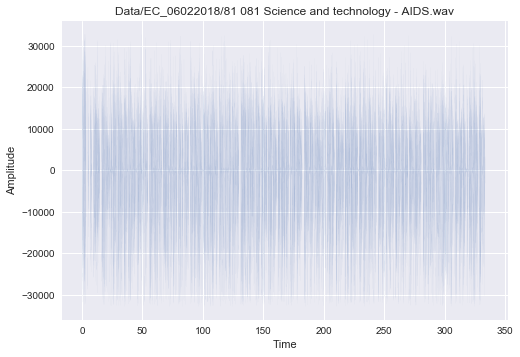

In [156]:
## Get the raw sound data as array
r_np = sound.get_array_of_samples()

##inspect time vs Amplitude
plt.clf()
plt.title(f_wav)
plt.plot(np.linspace(0, len(r_np)/sound.frame_rate, len(r_np)), r_np, linewidth=0.02, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

/Users/renormalization/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


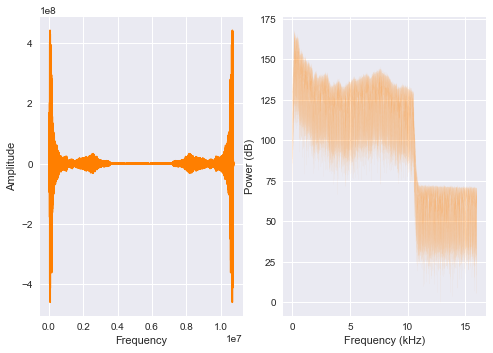

In [164]:
## Frequency analysis, if needed
fourier=fft.fft(r_np)
plt.clf()
plt.subplot(1, 2, 1)
plt.plot(fourier, color='#ff7f00')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

n = len(r_np)
fourier = fourier[0:int(n/2)]

# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)
fourier = abs(fourier)
fourier = fourier ** 2

# rebase 0 as the minimal voice
vol =  10*np.log10(fourier) - 10*np.log10(min(fourier))

#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (sound.frame_rate*1.0/n);

plt.subplot(1, 2, 2)
plt.plot(freqArray/1000, vol, color='#ff7f00', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
plt.show()


***
### Sound file decomposition
***

In [129]:
# split sound in 20-second slices and export
start_time = time.time()
sound_file = AudioSegment.from_wav(f_wav)

for i, chunk in enumerate(sound_file[::20 * 1000]):
  n_files = i
  with open("chunk-%s.wav" % i, "wb") as f:
    chunk.export(f, format="wav")

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.07065296173095703 seconds ---


In [165]:
!ls

Data         chunk-1.wav  chunk-13.wav chunk-2.wav  chunk-6.wav  newSong.wav
MVP.ipynb    chunk-10.wav chunk-14.wav chunk-3.wav  chunk-7.wav
README.md    chunk-11.wav chunk-15.wav chunk-4.wav  chunk-8.wav
chunk-0.wav  chunk-12.wav chunk-16.wav chunk-5.wav  chunk-9.wav


In [123]:
## silence split, if necessary
# start_time = time.time()
# sound_file = AudioSegment.from_wav(f_wav)
# audio_chunks = split_on_silence(sound_file, 
#     # must be silent for at least half a second
#     min_silence_len=1000,
#     # consider it silent if quieter than -16 dBFS
#     silence_thresh=-16)

# print(len(audio_chunks))
# ## split into chunks
# for i, chunk in enumerate(audio_chunks):
#     out_file = "chunk{0}.wav".format(i)
#     print("exporting", out_file)
#     chunk.export(out_file, format="wav")

# print("--- %s seconds ---" % (time.time() - start_time))

In [124]:
!ls
#! rm chunk*

Data         chunk-1.wav  chunk-13.wav chunk-2.wav  chunk-6.wav  newSong.wav
MVP.ipynb    chunk-10.wav chunk-14.wav chunk-3.wav  chunk-7.wav
README.md    chunk-11.wav chunk-15.wav chunk-4.wav  chunk-8.wav
chunk-0.wav  chunk-12.wav chunk-16.wav chunk-5.wav  chunk-9.wav



***
### Text recognition
***


In [141]:
fulltext = ""

In [147]:
start_time = time.time()
for i in tqdm(range(n_files + 1)):
    print(i)
    test = sr.AudioFile("chunk-%s.wav" % i)
    with test as source:
        test_au = r_rec.record(source)
        fulltext += r_rec.recognize_sphinx(test_au, language='en-US')
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/17 [00:00<?, ?it/s]

0


  6%|▌         | 1/17 [00:05<01:22,  5.15s/it]

1


 12%|█▏        | 2/17 [00:10<01:22,  5.48s/it]

2


 18%|█▊        | 3/17 [00:15<01:14,  5.33s/it]

3


 24%|██▎       | 4/17 [00:20<01:07,  5.18s/it]

4


 29%|██▉       | 5/17 [00:25<01:01,  5.11s/it]

5


 35%|███▌      | 6/17 [00:30<00:56,  5.16s/it]

6


 41%|████      | 7/17 [00:36<00:52,  5.25s/it]

7


 47%|████▋     | 8/17 [00:41<00:46,  5.19s/it]

8


 53%|█████▎    | 9/17 [00:47<00:42,  5.26s/it]

9


 59%|█████▉    | 10/17 [00:52<00:36,  5.27s/it]

10


 65%|██████▍   | 11/17 [00:58<00:31,  5.29s/it]

11


 71%|███████   | 12/17 [01:03<00:26,  5.27s/it]

12


 76%|███████▋  | 13/17 [01:08<00:21,  5.27s/it]

13


 82%|████████▏ | 14/17 [01:13<00:15,  5.25s/it]

14


 88%|████████▊ | 15/17 [01:18<00:10,  5.22s/it]

15


 94%|█████████▍| 16/17 [01:23<00:05,  5.23s/it]

16


100%|██████████| 17/17 [01:27<00:00,  5.16s/it]

--- 87.65929079055786 seconds ---


In [146]:
fulltext

"athens and how science and technology aids partying shilts studying h. i. v. in every organ is crucial to understanding how to eliminate it much of the medical research conducted on h. i. v. preferour circle wasn't paints looks as patients blonde this isn't a surprise landesbank easy to connect in dc to preside of the day driving is not confined to the blood stream is a virus infected or heads it is found in no way stallworth battle to tissues interview of davey smitha virologist at the university of california san diego to the c. s. d. focusing any on the metaphorical trees of the plot is that fool a mistake it misses her fall arrest of the overruled guns in somalia to buy similar programs in kansas and the senate deltasmith therefore setup in july twenty seventeen project cold announced gave it his seeks h. i. v. positive valenti as he would terminally ill for some other reason and asks them to bequeath their tissues the cryogenic preservation and subsequent starting so farfive peop

In [148]:
realtext = "MUCH of the medical research conducted on HIV, the virus that causes AIDS, looks at patients’ blood. This is no surprise. Blood is both easy to collect and easy to preserve. But HIV is not confined to the bloodstreams of those infected by it. It is found in almost all of their bodily tissues. In the view of Davey Smith, a virologist at the University of California, San Diego (UCSD), focusing only on the metaphorical “trees” of the blood is therefore a mistake. It misses the “forest” of the other organs. Inspired by similar programmes in cancer research, Dr Smith therefore set up, in July 2017, a project called “Last Gift”. This seeks HIV-positive volunteers who are terminally ill for some other reason and asks them to bequeath their tissues for cryogenic preservation and subsequent study. So far, five people have signed up, two of whom have died. Dr Smith hopes for 20 more over the next four years.The crux of Last Gift’s operation is speed, because HIV’s genes and proteins start to degrade within four hours of a patient’s death. An autopsy team is therefore always on call to attend a volunteer’s deathbed, collect samples from his organs and bring them back to a laboratory at UCSD for cryogenic preservation. The team take specimens of brain, spinal cord, lungs, heart, kidneys, liver, spleen, muscle, bone marrow, adrenal glands, thyroid, lymph nodes, genital-tract tissues, foreskin and intestine.That HIV can hide in such solid tissues has been known for years. It is a retrovirus, meaning that it integrates its genes into its host’s DNA. Once integrated in this way it can remain dormant indefinitely. The resulting reservoirs are the main barrier to eradicating it from someone’s system. Existing drugs control viral replication, but cannot affect dormant, integrated viral genes. If someone stops taking those drugs it requires only a small leak from one of the reservoirs to bring the infection roaring back. Dormancy, moreover, makes HIV invisible to the immune system. Understanding viral dormancy in solid tissues is thus important.Even though they have only two sets of tissues to work with at the moment, Dr Smith and his colleagues have already made discoveries. They have, for example, recorded surprisingly high levels of live (as opposed to dormant) virus in the brain, the spleen and the liver. They have also documented disparities in the levels of live virus within and between these organs.They are especially interested in epigenetic modifications of cells taken from their volunteers’ organs. Such modifications, which serve to regulate the activity of genes, are chemical alterations of a cell’s DNA and of the proteins in which that DNA is packed. The team hope to spot epigenetic patterns that will both give away those cells which are infected and help explain how HIV genes in a cell’s nucleus are activated and deactivated.Another area of specific concern is how HIV replicates in the gut. Most new particles of the virus are produced in immune-system cells called T-lymphocytes. And most of the human immune system resides in the intestines, where it deals with pathogens ingested by mouth that have not succumbed to the acidity of the stomach. Understanding what is going on in the intestines is thus crucial to understanding the way the infection sustains itself once it has become established.The need for speed means Last Gift is, at the moment, necessarily confined to volunteers living in, or close to, San Diego. But Dr Smith is hopeful that his method will be replicated elsewhere. His team are already sharing data with researchers at the University of California, San Francisco, who might one day start their own version of the operation. And scientists from three other American universities, and also the National Institutes of Health, have expressed interest in partnerships. That is to be welcomed. Any true cure for HIV infection will involve flushing the virus out of its solid-tissue hidey-holes. Knowing what is really going on in those hidey-holes is therefore essential."

In [149]:
realtext

'MUCH of the medical research conducted on HIV, the virus that causes AIDS, looks at patients’ blood. This is no surprise. Blood is both easy to collect and easy to preserve. But HIV is not confined to the bloodstreams of those infected by it. It is found in almost all of their bodily tissues. In the view of Davey Smith, a virologist at the University of California, San Diego (UCSD), focusing only on the metaphorical “trees” of the blood is therefore a mistake. It misses the “forest” of the other organs. Inspired by similar programmes in cancer research, Dr Smith therefore set up, in July 2017, a project called “Last Gift”. This seeks HIV-positive volunteers who are terminally ill for some other reason and asks them to bequeath their tissues for cryogenic preservation and subsequent study. So far, five people have signed up, two of whom have died. Dr Smith hopes for 20 more over the next four years.The crux of Last Gift’s operation is speed, because HIV’s genes and proteins start to de

***
### Text exploration
***

In [166]:
import nltk

In [167]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(realtext)

# Printing out the first 8 words / tokens 
print(tokens[:8])

['MUCH', 'of', 'the', 'medical', 'research', 'conducted', 'on', 'HIV']


In [168]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

# Printing out the first 8 words / tokens 
print(words[:8])

['much', 'of', 'the', 'medical', 'research', 'conducted', 'on', 'hiv']


In [169]:
# Getting the English stop words from nltk
# first time: nltk.download('stopwords')
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
print(sw[:8])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']


In [170]:
# A new list to hold Moby Dick with No Stop words
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Printing the first 5 words_ns to check that stop words are gone
print(words_ns[:5])

['much', 'medical', 'research', 'conducted', 'hiv']


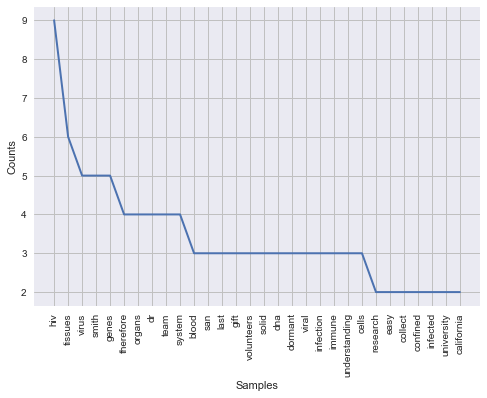

In [171]:
# Creating the word frequency distribution
freqdist = nltk.probability.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(30)

In [176]:
print(freqdist.most_common(20))

[('hiv', 9), ('tissues', 6), ('virus', 5), ('smith', 5), ('genes', 5), ('therefore', 4), ('organs', 4), ('dr', 4), ('team', 4), ('system', 4), ('blood', 3), ('san', 3), ('last', 3), ('gift', 3), ('volunteers', 3), ('solid', 3), ('dna', 3), ('dormant', 3), ('viral', 3), ('infection', 3)]


***
### Audio import
***

In [181]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 10
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

start_time = time.time()
test = sr.AudioFile('output.wav')
with test as source:
    test_au = r_rec.record(source, duration=10)
print("Sphinx:", r_rec.recognize_sphinx(test_au, language='en-US', keyword_entries=None, grammar=None, show_all=False))
print("--- %s seconds ---" % (time.time() - start_time))

* recording
* done recording
Sphinx: i'll have a rabbi the stony entered and let live for france is really pretty and have a read about katie and he
--- 5.097718954086304 seconds ---


In [179]:
!ls

Data         chunk-1.wav  chunk-13.wav chunk-2.wav  chunk-6.wav  newSong.wav
MVP.ipynb    chunk-10.wav chunk-14.wav chunk-3.wav  chunk-7.wav  output.wav
README.md    chunk-11.wav chunk-15.wav chunk-4.wav  chunk-8.wav
chunk-0.wav  chunk-12.wav chunk-16.wav chunk-5.wav  chunk-9.wav
